In [ ]:
!pip install nltk
!pip install wordcloud
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 7.0 MB/s eta 0:00:00


In [ ]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df['artist'].unique()

array(['ABBA', 'Ace Of Base', 'Adam Sandler', 'Adele', 'Aerosmith',
       'Air Supply', 'Aiza Seguerra', 'Alabama', 'Alan Parsons Project',
       'Aled Jones', 'Alice Cooper', 'Alice In Chains', 'Alison Krauss',
       'Allman Brothers Band', 'Alphaville', 'America', 'Amy Grant',
       'Andrea Bocelli', 'Andy Williams', 'Annie', 'Ariana Grande',
       'Ariel Rivera', 'Arlo Guthrie', 'Arrogant Worms', 'Avril Lavigne',
       'Backstreet Boys', 'Barbie', 'Barbra Streisand', 'Beach Boys',
       'The Beatles', 'Beautiful South', 'Beauty And The Beast',
       'Bee Gees', 'Bette Midler', 'Bill Withers', 'Billie Holiday',
       'Billy Joel', 'Bing Crosby', 'Black Sabbath', 'Blur', 'Bob Dylan',
       'Bob Marley', 'Bob Rivers', 'Bob Seger', 'Bon Jovi', 'Boney M.',
       'Bonnie Raitt', 'Bosson', 'Bread', 'Britney Spears',
       'Bruce Springsteen', 'Bruno Mars', 'Bryan White', 'Cake',
       'Carly Simon', 'Carol Banawa', 'Carpenters', 'Cat Stevens',
       'Celine Dion', 'Chaka Khan

In [ ]:

df.shape

(57650, 4)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Alabama             187
Reba Mcentire       187
Cher                187
Loretta Lynn        187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [ ]:

df = df.drop('link', axis=1).reset_index(drop=True)

In [ ]:
df.sample(25000)
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


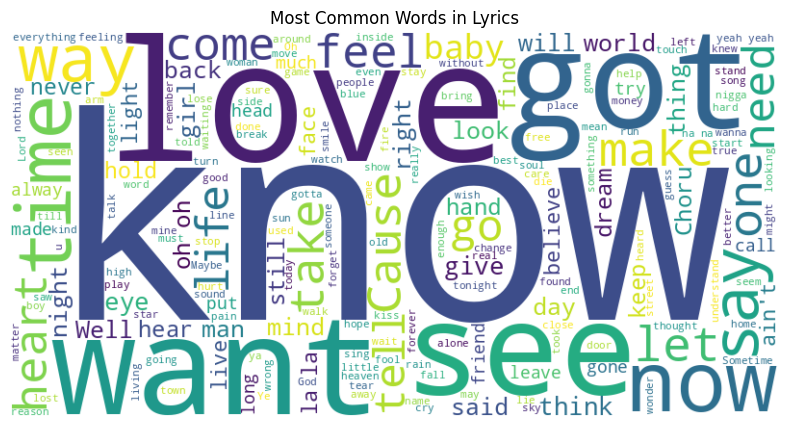

In [ ]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [ ]:

# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

df.shape

(57650, 3)

In [ ]:

stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,ill never know go put lousy rotten show boy to...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...


In [ ]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [ ]:
df["song"][2]

'As Good As New'

In [ ]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
                artist                     song
39967    Kenny Loggins       For The First Time
18138          Roxette  For The Very First Time
38057      John Legend       For The First Time
30965  Ella Fitzgerald          Beginner's Luck
28195    Conway Twitty       First Things First


In [ ]:
import joblib

# Assume 'df' and 'cosine_sim' are your created objects
joblib.dump(df, 'df_cleaned.pkl')
joblib.dump(cosine_sim, 'cosine_sim.pkl')

['cosine_sim.pkl']